# Analytics DataCube

> 👋 Before moving on with this demo, you must first sign-up and request your Geosys APIs credentials here :
> - ⚙️[Try it now](https://www.earthdaily.com/geosys/geosys-api/)

> For more information about our Geosys APIs : 
> - 📚 [Geosys APIs to connect with your digital ag application](https://www.earthdaily.com/geosys/geosys-api/)


> **Demo Project:** This demo demonstrates the ability to create an Analytics Datacube of CLEAR images based on geosysPy



### @author: Geosys



 ## 1️⃣ Import all librairies needed and get an autorization to use Analytics Datacube

In [151]:
import sys
import os
sys.path.append(os.path.join('..','src'))
from geosyspy import Geosys
from geosyspy.utils.constants import *
from dotenv import load_dotenv
from datetime import datetime
# from dateutil.relativedelta import relativedelta
# from analytics_datacube.processor import AnalyticsDatacube
# from analytics_datacube.utils import dataset_to_zarr_format
import datetime as dt
import logging
from cloud_storage import cloud_storage_aws,cloud_storage_azure

logger = logging.getLogger()
#logger.setLevel(logging.ERROR)
logger.setLevel(logging.WARNING)

# read .env file
load_dotenv()


import geopandas as gpd
import stackfox
import shapely
import itertools
import numpy as np
import pandas as pd
import geopandas as gpd

import xarray as xr
from pystac import ItemCollection
import json
import matplotlib.pyplot as plt
import rioxarray
import xarray as xr
import zarr
from azure.storage.blob import ContainerClient

In [ ]:
polygon = "POLYGON ((1.26 43.427, 1.263 43.428, 1.263 43.426, 1.26 43.426, 1.26 43.427))"
pol = shapely.wkt.loads(polygon)
dataframe_pol = gpd.GeoDataFrame([[1,pol]],columns=['id','geometry'])
dataframe_pol.set_geometry('geometry',inplace=True)
dataframe_pol.set_crs('epsg:4326',inplace=True)

In [156]:
import zarr
from azure.storage.blob import ContainerClient
account_storage = os.getenv('AZURE_ACCOUNT_NAME')
account_url = f'https://{account_storage}.blob.core.windows.net'
container_name = os.getenv('AZURE_BLOB_CONTAINER_NAME')
prefix = '2019-05-01_2019-05-31_lamothe_lst_rgb_datacube.zarr'
credential = os.getenv('AZURE_SAS_CREDENTIAL')

container_client = ContainerClient(account_url=account_url, container_name=container_name, credential=credential)
store = zarr.ABSStore(client=container_client, prefix=prefix)
cube = xr.open_zarr(store=store, consolidated=True)

In [159]:
cube

<xarray.Dataset>
Dimensions:      (time: 4, y: 22, x: 25)
Coordinates:
    coord        int64 ...
    spatial_ref  int64 ...
  * time         (time) datetime64[ns] 2019-05-01 2019-05-06 ... 2019-05-16
  * x            (x) float64 3.592e+05 3.592e+05 ... 3.594e+05 3.594e+05
  * y            (y) float64 4.81e+06 4.81e+06 4.81e+06 ... 4.81e+06 4.81e+06
Data variables:
    blue         (time, y, x) float64 dask.array<chunksize=(1, 22, 25), meta=np.ndarray>
    green        (time, y, x) float64 dask.array<chunksize=(1, 22, 25), meta=np.ndarray>
    red          (time, y, x) float64 dask.array<chunksize=(1, 22, 25), meta=np.ndarray>
Attributes:
    usable_pixels:  402

In [160]:
cube.blue

<xarray.DataArray 'blue' (time: 4, y: 22, x: 25)>
dask.array<open_dataset-162d70155a467e0f70e511e4f4fabe9dblue, shape=(4, 22, 25), dtype=float64, chunksize=(1, 22, 25), chunktype=numpy.ndarray>
Coordinates:
    coord        int64 ...
    spatial_ref  int64 ...
  * time         (time) datetime64[ns] 2019-05-01 2019-05-06 ... 2019-05-16
  * x            (x) float64 3.592e+05 3.592e+05 ... 3.594e+05 3.594e+05
  * y            (y) float64 4.81e+06 4.81e+06 4.81e+06 ... 4.81e+06 4.81e+06

In [164]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [171]:
Date_0 = np.array([cube.blue.values[0],cube.red.values[0],cube.green.values[0]])

In [172]:
Date_0.shape

(3, 22, 25)

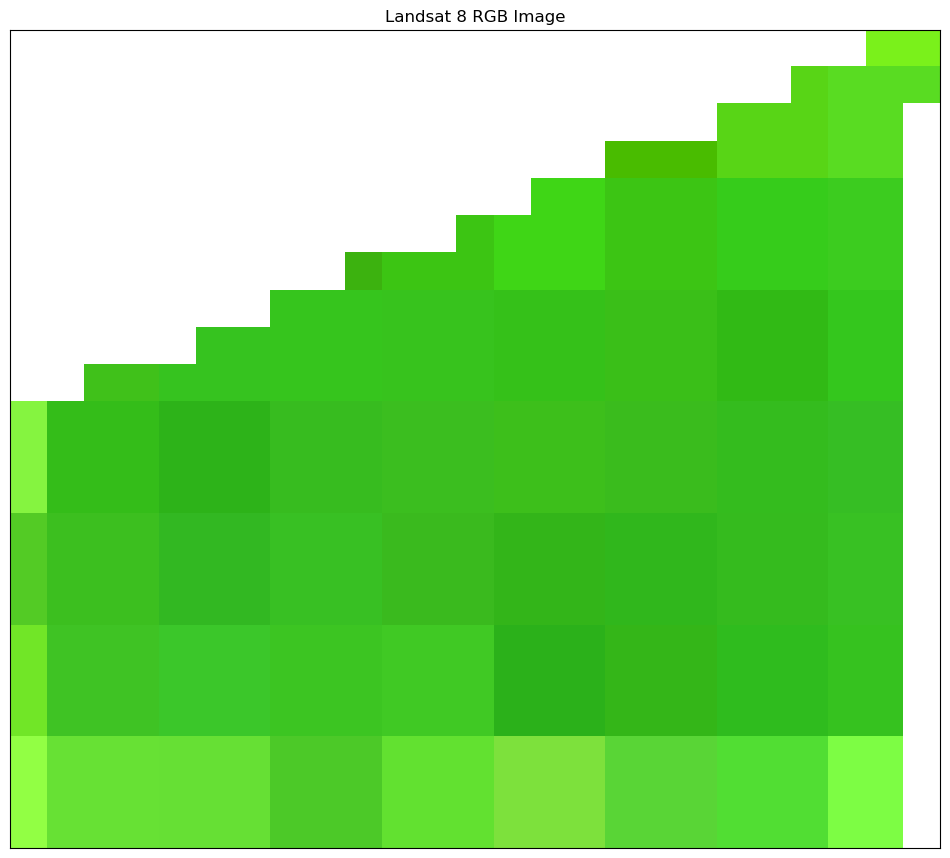

In [175]:
# Create figure with one plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot red, green, and blue bands, respectively
ep.plot_rgb(Date_0, rgb=(1, 2, 0), ax=ax, title="Landsat 8 RGB Image")
plt.show()

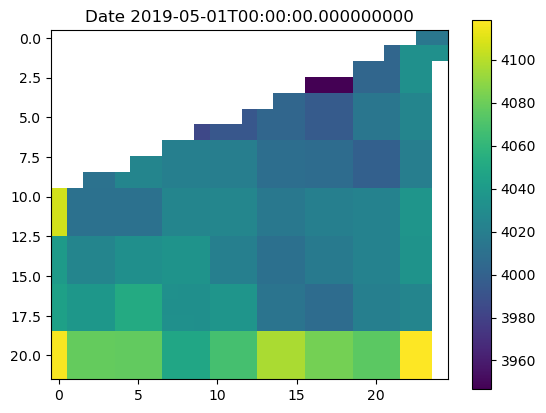

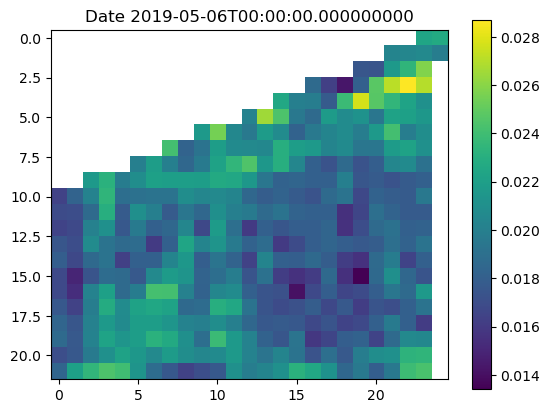

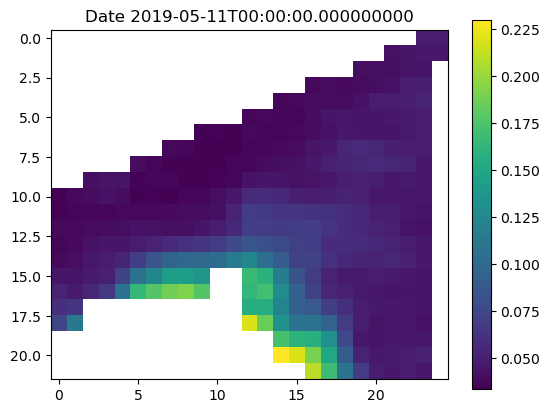

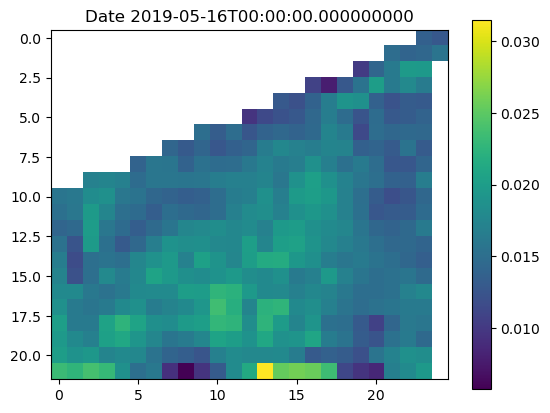

In [162]:
for date, raster in cube.blue.groupby('time'):
    plt.title(f'Date {date}')
    plt.imshow(raster,cmap='viridis')
    plt.colorbar()
    plt.show()


INFO:azure.core.pipeline.policies.http_logging_policy:Request URL: 'https://pfresearchscussa.blob.core.windows.net/sandbox-lwh/2019-05-01_2019-12-31_field_1_datacube.zarr/.zmetadata?sp=REDACTED&st=REDACTED&se=REDACTED&spr=REDACTED&sv=REDACTED&sr=REDACTED&sig=REDACTED'
Request method: 'GET'
Request headers:
    'x-ms-range': 'REDACTED'
    'x-ms-version': 'REDACTED'
    'Accept': 'application/xml'
    'User-Agent': 'azsdk-python-storage-blob/12.17.0 Python/3.10.12 (Windows-10-10.0.22621-SP0)'
    'x-ms-date': 'REDACTED'
    'x-ms-client-request-id': '30529c02-525c-11ee-82be-546cebbff6e8'
No body was attached to the request
INFO:azure.core.pipeline.policies.http_logging_policy:Response status: 206
Response headers:
    'Content-Length': '11759'
    'Content-Type': 'application/octet-stream'
    'Content-Range': 'REDACTED'
    'Last-Modified': 'Wed, 13 Sep 2023 17:23:03 GMT'
    'Accept-Ranges': 'REDACTED'
    'ETag': '"0x8DBB47E165EBCA0"'
    'Server': 'Windows-Azure-Blob/1.0 Microsoft-H

In [150]:
zarr.blue

<xarray.DataArray 'blue' (time: 59, y: 22, x: 25)>
dask.array<open_dataset-0079632eae5e6c994ba97d050aa7e600blue, shape=(59, 22, 25), dtype=float64, chunksize=(1, 22, 25), chunktype=numpy.ndarray>
Coordinates:
    coord        int64 ...
    spatial_ref  int64 ...
  * time         (time) datetime64[ns] 2019-05-01 2019-05-06 ... 2019-12-30
  * x            (x) float64 3.592e+05 3.592e+05 ... 3.594e+05 3.594e+05
  * y            (y) float64 4.81e+06 4.81e+06 4.81e+06 ... 4.81e+06 4.81e+06

 ## 2️⃣ Input data

These input parameters are utilized in the demo to generate Analytics DataCube


##### polygon: 
A polygon string in WKT format. This polygon defines the boundaries of the area under analysis.

#### start_date: 
A datetime object representing the start date of generated DataCube.

#### end_date: 
A datetime object representing the end date of generated  DataCube

#### indicators: 
A string array representing index indicators on wich the analysis is made.
Possible values for indicator are:
- ndvi
- evi
- gndvi
- ndwi
- cvi
- cvin
- lai

In [2]:
polygon = "POLYGON((-90.41 41.6663, -90.41 41.6545, -90.3775 41.6541, -90.3778 41.6660, -90.41 41.6663))"

startDate = datetime.strptime("2023-06-01", "%Y-%m-%d")

endDate = datetime.strptime("2023-07-01", "%Y-%m-%d")

indicators = ["NDVI", "NDWI", "EVI"]

In [153]:
cols_optics = ['landsat-c2l2-st','venus-l2a','sentinel-2-l2a']

In [154]:
import stackfox

 

skyfox = stackfox.SkyFox()
collections  = [i.id for i in list(skyfox.client.get_all_collections())]

 

for collection in cols_optics:
    try:      
        assets = skyfox.explore(collection).assets()
        assets_common_name = []
        for asset in assets:
            common_name = skyfox.explore(collection).assets(asset).get('eo:bands',[{}])[0].get('common_name','')
            assets_common_name.append(common_name)
            
        print(f'List of assets and common name for {collection}')
        print({a:b for a,b in zip(assets,assets_common_name)})

 

    except:
        print(f'No item for {collection}')
    print(50*'=')

List of assets and common name for landsat-c2l2-st
{'ANG.txt': '', 'ATRAN': '', 'CDIST': '', 'DRAD': '', 'EMIS': '', 'EMSD': '', 'MTL.json': '', 'MTL.txt': '', 'MTL.xml': '', 'TRAD': '', 'URAD': '', 'index': '', 'lwir11': 'lwir11', 'qa': '', 'qa_pixel': '', 'qa_radsat': '', 'reduced_resolution_browse': '', 'thumbnail': ''}
List of assets and common name for venus-l2a
{'atmospheric_biophysical_parameters': '', 'detailed_cloud_mask': '', 'edge_image': '', 'image_file_FRE_B1': 'coastal', 'image_file_FRE_B10': 'rededge', 'image_file_FRE_B11': 'nir08', 'image_file_FRE_B12': 'nir09', 'image_file_FRE_B2': 'coastal', 'image_file_FRE_B3': 'blue', 'image_file_FRE_B4': 'green', 'image_file_FRE_B5': 'yellow', 'image_file_FRE_B6': 'yellow', 'image_file_FRE_B7': 'red', 'image_file_FRE_B8': 'rededge', 'image_file_FRE_B9': 'rededge', 'image_file_SRE_B1': 'coastal', 'image_file_SRE_B10': 'rededge', 'image_file_SRE_B11': 'nir08', 'image_file_SRE_B12': 'nir09', 'image_file_SRE_B2': 'coastal', 'image_file